In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
wine = pd.read_csv('wineData.txt',  index_col = None, header = None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [4]:
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Informació rellevant: Aquestes dades són els resultats d'una anàlisi química de vins cultivats a la mateixa regió d'Itàlia però derivats de tres varietats diferents. L'anàlisi va determinar les quantitats de 13 constituents que es troben en cadascun dels tres tipus de vins.

Nombre d'instàncies:

- classe 1: 59
- classe 2: 71
- classe 3: 48

Nombre d'atributs: 13 atributs continus

Informació de l'atribut:

1. Alcohol
2. Àcid màlic
3. Cendra
4. Alcalinitat de la cendra
5. Magnesi
6. Fenols totals
7. Flavonoides
8. Fenols no flavonoides
9. Proantocianines
10. Intensitat del color
11. Tonalitat
12. DO280/DO315 dels vins diluïts
13. Prolina

Començarem fent una exploració de dades i gràfica:

In [5]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

Observem que totes les columnes són numèriques menys class, que és categòrica.

In [7]:
wine.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
wine.isna().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [9]:
wine.duplicated().sum()

0

No hi ha valors faltants, NaN o duplicats.

<AxesSubplot:xlabel='class', ylabel='count'>

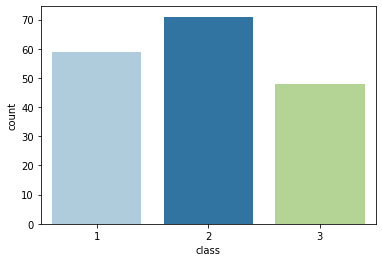

In [10]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(wine['class'], palette = 'Paired')

Veiem que hi ha més vins de la classe 2, després vins de la classe 1 i per últim, de la 3. No són unes dades del tot balencejades.

Fem una exploració gràfica veient boxplots per detectar outliers i una combinació de histplot i kdeplot per veure la distribució de les diferents variables. 

<Figure size 432x288 with 0 Axes>

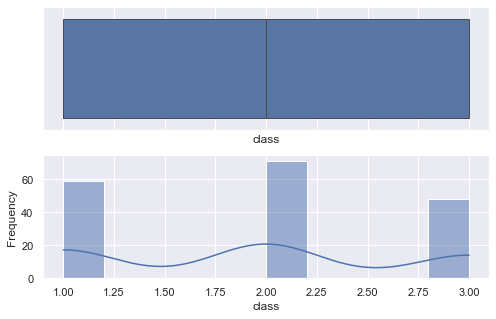

<Figure size 576x360 with 0 Axes>

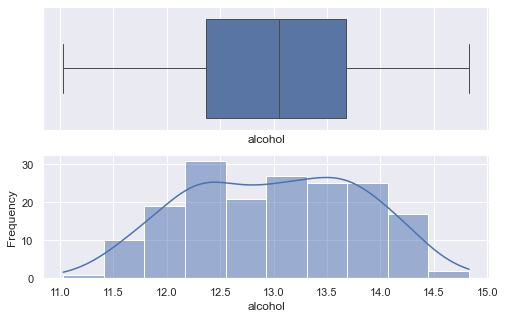

<Figure size 576x360 with 0 Axes>

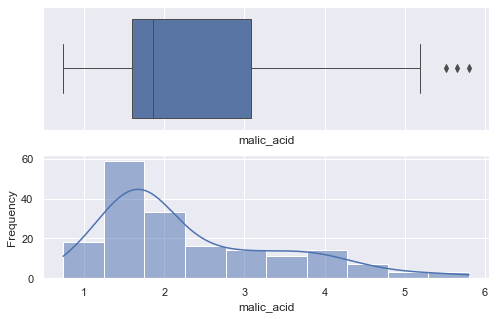

<Figure size 576x360 with 0 Axes>

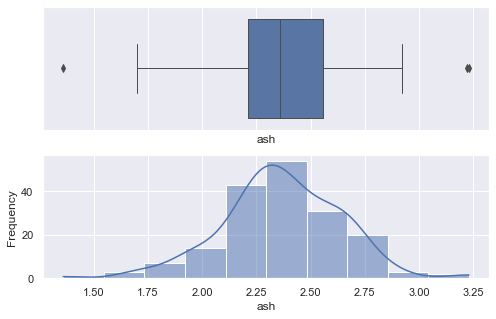

<Figure size 576x360 with 0 Axes>

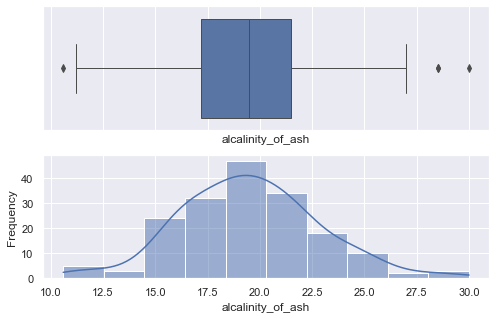

<Figure size 576x360 with 0 Axes>

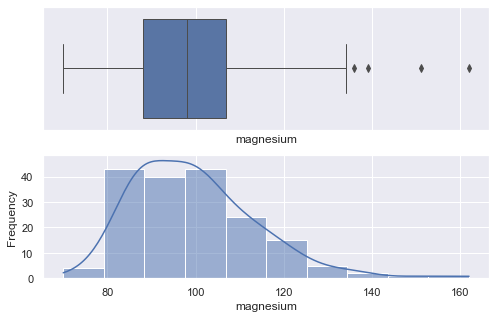

<Figure size 576x360 with 0 Axes>

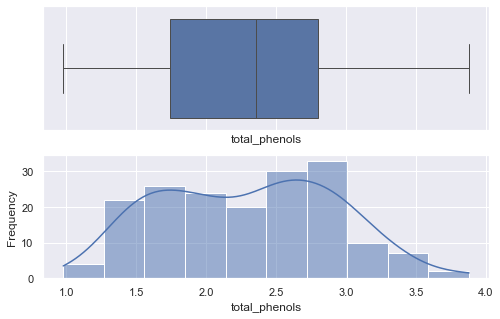

<Figure size 576x360 with 0 Axes>

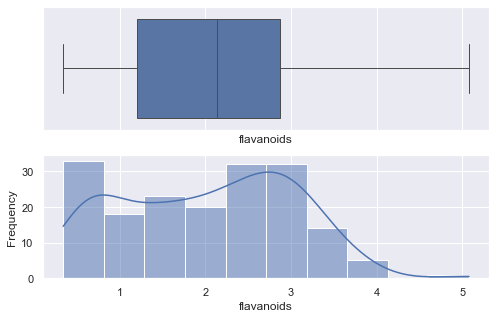

<Figure size 576x360 with 0 Axes>

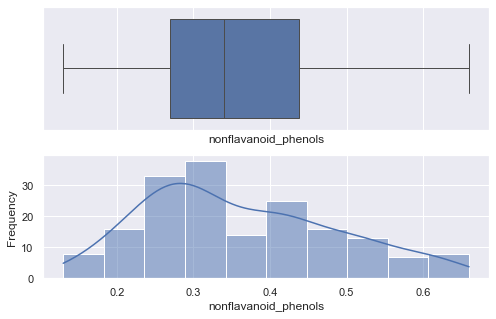

<Figure size 576x360 with 0 Axes>

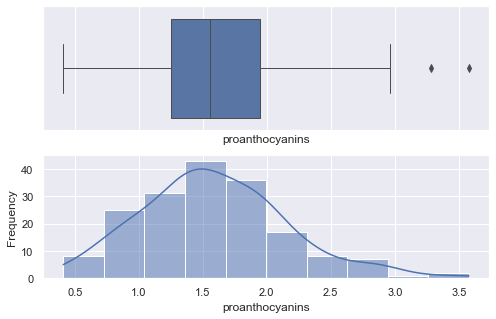

<Figure size 576x360 with 0 Axes>

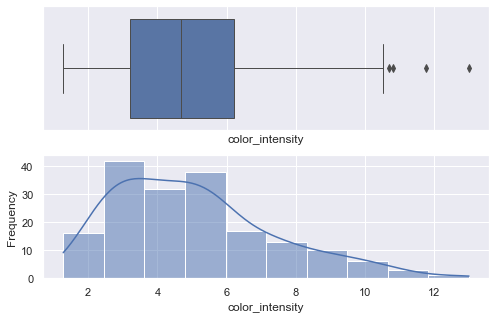

<Figure size 576x360 with 0 Axes>

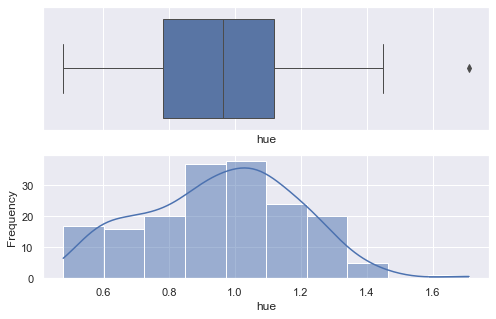

<Figure size 576x360 with 0 Axes>

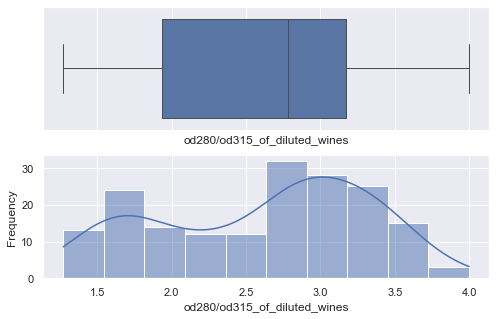

<Figure size 576x360 with 0 Axes>

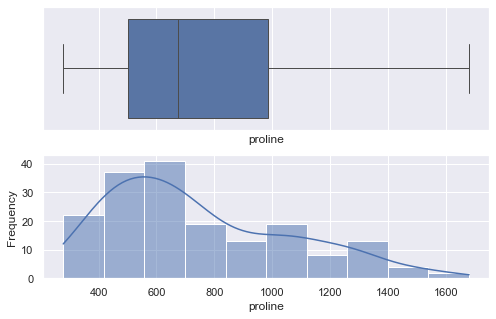

In [11]:
import warnings
warnings.filterwarnings("ignore")

for i in wine.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(wine[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(wine[i], ax=ax_hist , bins = 10,kde=True)

Algunes coses a destacar:

- Class: hi ha més vins de la classe 2.
- Alcohol: el boxplot no presenta outliers i la distribució es concentra entre els 12.5 i els 14 graus.
- Malic_acid: presenta outliers i la distribució es concentra al voltant de l'1.5.
- Ash: presenta outliers i la distribució sembla força normal, concentrant-se entre 2.25 i 2.50. 
- Alcalinity of ash: té outliers, la distribució sembla normal i es concentra sobretot al voltant del 20. 
- Magnesium: té outliers, i la distribució es concrentra entre 80 i 100. 
- Total phenols: no presenta outliers i la distribució es concentra entre el 2.5 i el 3. 
- Flavanoids: no presenta outliers i la distribució és reparteix entre el 0.5 i el 3. 
- Non flavanoids phenols: no presenta outliers i la distribució és concentra al voltant del 0.3.
- Proanthocyanins: presenta outliers i la distribució presenta una tendència gairebé normal, concentrada al voltant del 1.5.
- Color intensity: presenta outliers i es concentra al voltant de 3. 
- Hue: presenta algun outlier i es concentra al voltant d'1. 
- Od280/od315 of diluted wines:no presenta outliers i es concentra al voltant de 2.75.
- Proline: no presenta outliers i es concentra al voltant de 600.

Explorem el dataset fent una gràfica de pairplot per veure, sobretot, correlacions entre dades.

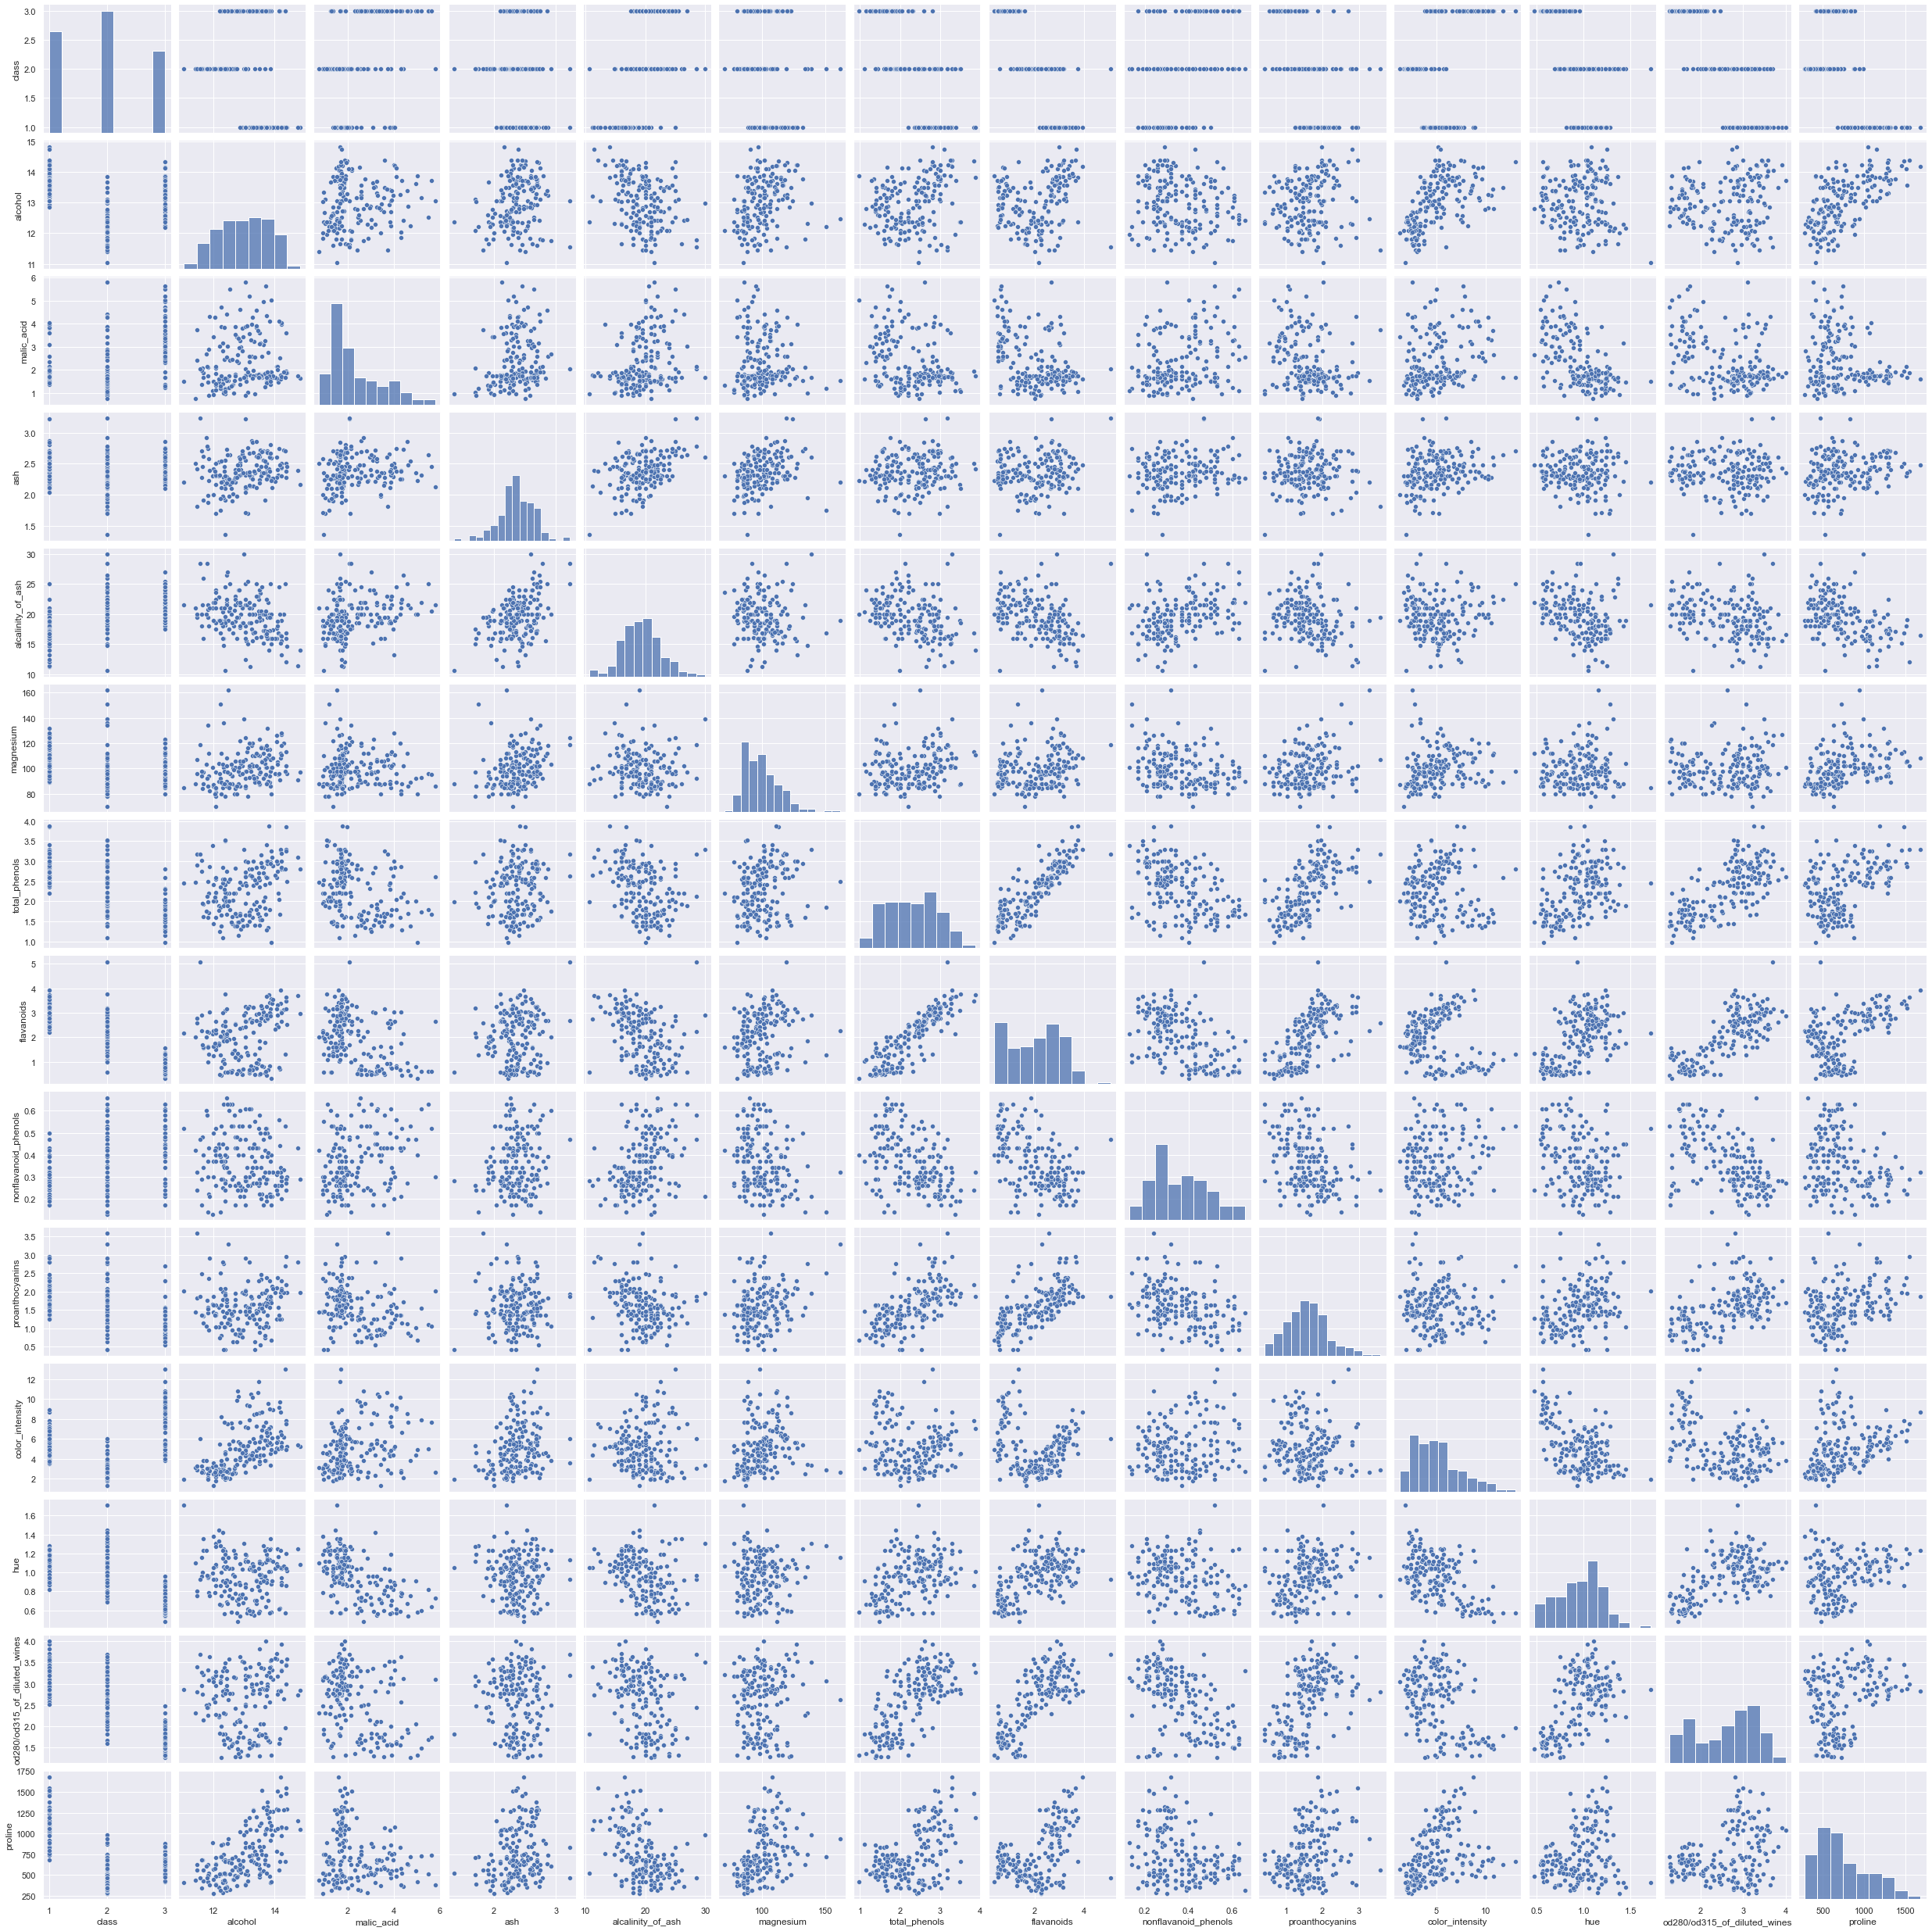

In [12]:
sns.pairplot(wine)

<AxesSubplot:>

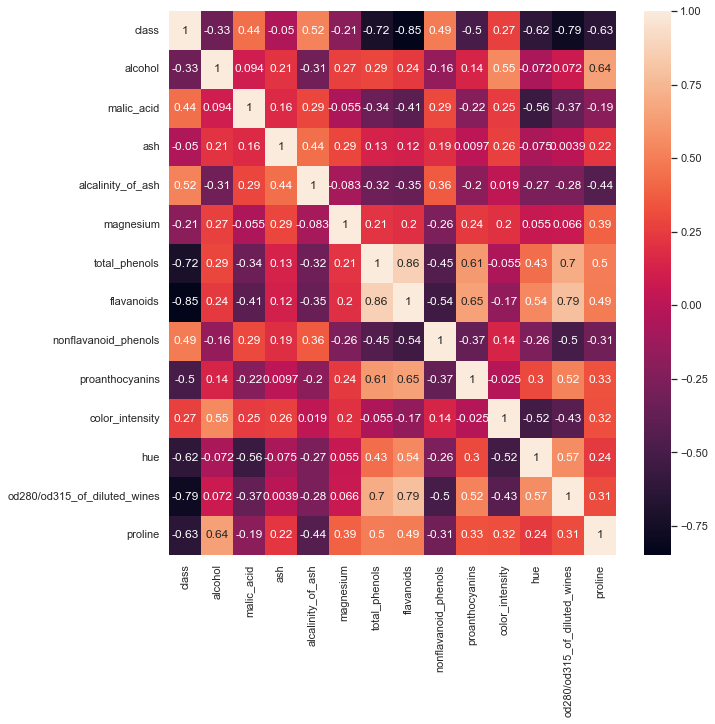

In [13]:
plt.figure(figsize=(10, 10))
wine.corr()
sns.heatmap(wine.corr(), annot=True)

Correlacions amb la variable que ens interessa per la classificació(class):
- Correlació negativa entre class i total phenols
- Correlació negativa entre class i flavanoids
- Correlació negativa entre class i od280/od315_of_diluted_wines

Això significa que a mesura que la classe augmenta, la quantitat d'aquests elements tendeix a disminuir. Per tant en vins considerats més bons n'hi ha menys quantitat.

### - Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

- En primer lloc mirem si s'han de transformar variables categòriques (en aquest cas no, ja que l'única categòrica és el target (class) i no es transforma. 
- Comprobem si les variables tenen una distribució normal. Les que la tinguin, s'ha d'aplicar l'Estandarització.
- Si no tenen distribució normal, veurem si tenen outliers. Si en tenen, s'aplicarà el Robust Scaler. Si no en tenen, la Normalització. 

Apliquem una funció amb test d'hipòtesi per determinar si les variables numèriques del DataFrame tenen una distribució normal.

In [14]:
from scipy import stats

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in wine.columns:
    shapiro_test = stats.shapiro(wine[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  class amb un p-value de  3.526998097335039e-14
Podem rebutjar l'hipotesis nula

Per la variable  alcohol amb un p-value de  0.02005171775817871
Podem rebutjar l'hipotesis nula

Per la variable  malic_acid amb un p-value de  2.9459296113643063e-10
Podem rebutjar l'hipotesis nula

Per la variable  ash amb un p-value de  0.03868526220321655
Podem rebutjar l'hipotesis nula

Per la variable  alcalinity_of_ash amb un p-value de  0.26386943459510803
No podem rebutjar hipotesis nula

Per la variable  magnesium amb un p-value de  6.345416068143095e-07
Podem rebutjar l'hipotesis nula

Per la variable  total_phenols amb un p-value de  0.004395752213895321
Podem rebutjar l'hipotesis nula

Per la variable  flavanoids amb un p-value de  1.6790636436780915e-05
Podem rebutjar l'hipotesis nula

Per la variable  nonflavanoid_phenols amb un p-value de  0.000105526

La varibale "alcalinity_of_ash" és l'única que presenta una distribució normal, li apliquem, per tant, l'estandarització. 

In [15]:
columna_alcash = wine[['alcalinity_of_ash']]
scaler = StandardScaler().fit(columna_alcash)
columna_alcash = scaler.transform(columna_alcash)
wine['alcalinity_of_ash'] = columna_alcash

Les columnes que tenen outliers, com s'ha vist als gràfics de columnes anteriors són 'malic_acid','ash','magnesium','proanthocyanins', 'color_intensity', 'hue': 

In [16]:
columnsRobust = ['malic_acid','ash','magnesium','proanthocyanins', 'color_intensity', 'hue']
scaler = preprocessing.RobustScaler().fit(wine[columnsRobust])
wine[columnsRobust] = scaler.transform(wine[columnsRobust])

Les que no en tenen són la resta:

In [17]:
columnsNorm = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','od280/od315_of_diluted_wines', 'proline']
scaler = preprocessing.MinMaxScaler().fit(wine[columnsNorm])
wine[columnsNorm] = scaler.transform(wine[columnsNorm])

In [18]:
wine

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


Podem comprovar com s'han escalat les dades preprocessades.

### - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

#### Separem el data set en train i test:

In [19]:
X = wine.drop(['class'],axis=1)
y = wine['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [21]:
wine_mean = wine.mean()
wine_std = wine.std()
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_test_mean = X_test.mean()
X_test_std = X_test.std()

wine_stats = pd.DataFrame({'wine_mean': wine_mean, 'wine_std': wine_std})
X_train_stats = pd.DataFrame({'Xtrain_mean': X_train_mean, 'Xtrain_std': X_train_std})
X_test_stats = pd.DataFrame({'Xtest_mean': X_test_mean, 'Xtest_std': X_test_std})

all_stats = pd.concat([wine_stats, X_train_stats, X_test_stats], keys=['wine', 'X_train', 'X_test'], axis=1)

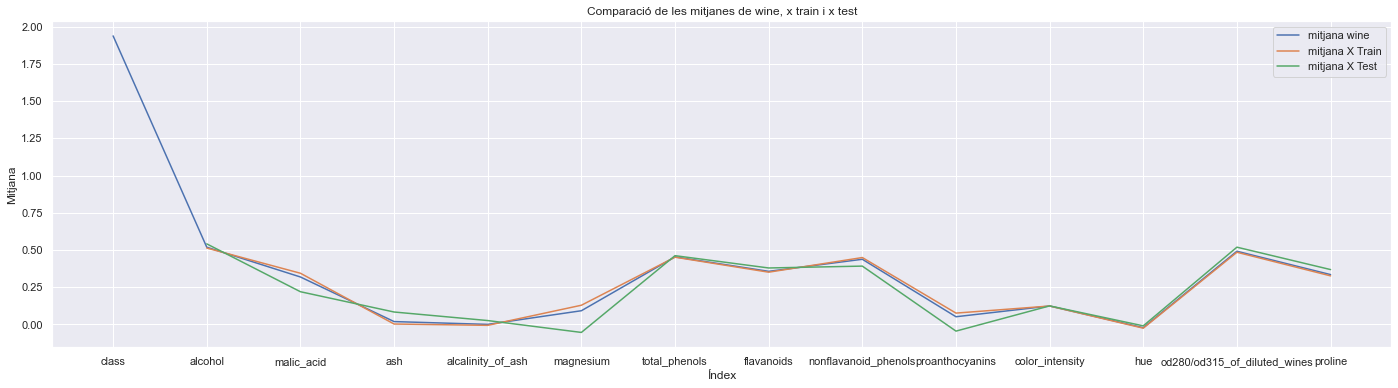

In [22]:
plt.figure(figsize=(24, 6))
plt.plot(all_stats['wine']['wine_mean'], label='mitjana wine')
plt.plot(all_stats['X_train']['Xtrain_mean'], label='mitjana X Train')
plt.plot(all_stats['X_test']['Xtest_mean'], label='mitjana X Test')
plt.title('Comparació de les mitjanes de wine, x train i x test')
plt.xlabel('Índex')
plt.ylabel('Mitjana')
plt.legend()
plt.show()

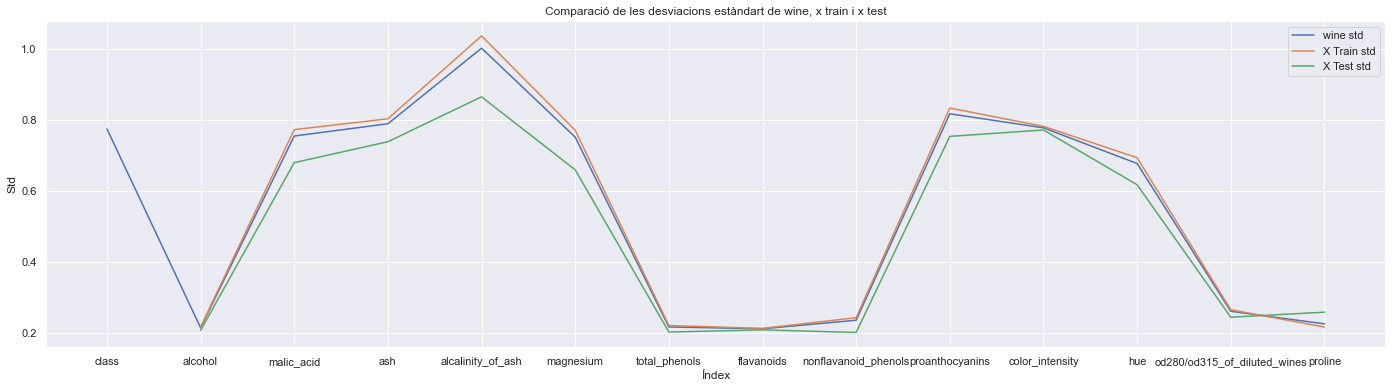

In [23]:
plt.figure(figsize=(24, 6))
plt.plot(all_stats['wine']['wine_std'], label='wine std')
plt.plot(all_stats['X_train']['Xtrain_std'], label='X Train std')
plt.plot(all_stats['X_test']['Xtest_std'], label='X Test std')
plt.title('Comparació de les desviacions estàndart de wine, x train i x test')
plt.xlabel('Índex')
plt.ylabel('Std')
plt.legend()
plt.show()

Comparant les mitjanes veiem que el conjunt de X train té una mitjana lleugerament superior al dataset original y el conjunt de test. El fet que el conjunt de prova tingui una mitjana i una desviació estandart més baixa pot indicar una distribució desigual de les dades. Això és plausible donat que la separació del dataset es fa de manera aleatoria.

#### Apliquem el models Logistic Regression i K-Nearest Neighbors

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

Entrenem els models:

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

Fem les prediccions:

In [28]:
y_pred_lr = lr.predict(X_test)
y_pred_lr[:5]

array([1, 1, 3, 1, 2])

In [29]:
y_pred_kn = kn.predict(X_test)
y_pred_kn[0:5]

array([1, 3, 3, 1, 2])

### - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [30]:
from sklearn import metrics
accur_lr = metrics.accuracy_score(y_test, y_pred_lr)
accur_kn = metrics.accuracy_score(y_test, y_pred_kn)

In [31]:
metrics = pd.DataFrame(data = [('Logistic Regression', accur_lr), 
                              ('K-Nearest Neighbors', accur_kn)],
                             columns = ['Model', 'Accuracy'])

metrics

,Model,Accuracy
0,Logistic Regression,0.944444
1,K-Nearest Neighbors,0.861111


In [32]:
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_kn = f1_score(y_test, y_pred_kn, average='macro')

In [33]:
metrics_f1 = pd.DataFrame(data = [('Logistic Regression', f1_lr), 
                              ('K-Nearest Neighbors', f1_kn)],
                             columns = ['Model', 'f1'])

metrics_f1

,Model,f1
0,Logistic Regression,0.943257
1,K-Nearest Neighbors,0.864062


Podem observar que amb la mètrica f1 obtenim uns resultats molt semblants als de l'accuracy, varien en  dècimes. En casos models de classificació, si les dades són esbiaixades com en el nostre cas, l'accuracy és menys fiable que l'f1 score.

Procedim a visualitzar una matriu de confussió:

In [34]:
from sklearn.metrics import confusion_matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cf_matrix_kn = confusion_matrix(y_test, y_pred_kn)

[Text(0.5, 1.0, 'Confusion matrix for LR')]

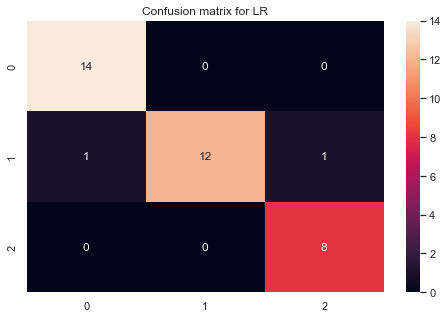

In [35]:
sns.heatmap(cf_matrix_lr, annot=True).set(title='Confusion matrix for LR')

Visualitzar una matriu de confusió permet medir el rendiment de models de classificació. Els True Positive són de color més clar mentre que els False Negative són foscos. Veient la matriu es pot visualitzar el rendiment i veure si hi ha un biaix cap a una classe específica i es proporciona informació per a millorar el model.

Aquí podem observar que el model prediu perfectament la classe 1 (14), la 3 (8) i per últim la 2(12), que en falla 2. Tenint en compte que les mostres de casa classe són 14, 14 i 8, són uns bons resultats. Per altre banda només trobem dos False Negative.
    

Ara executarem un classification report que ja inclou algunes de les mètriques que hem visualitzat:

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



A més de les mètriques per a cada classe, l'informe de classificació també proporciona la precisió, sensibilitat i puntuació F1 mitjana per a totes les classes.

Amb l'informe de classificació podem analitzar el rendiment del model de classificació a cada classe individualment i per comparar el rendiment entre diferents classes. Es poden identificar problemes i si un model està esbiaixat cap a una classe específica i així millorar-lo.

En aquest cas ens dona uns valors alts de gairebé totes les categories. Es podria destacar per exemple, el recall una mica més baix que la resta de la classe 2.

[Text(0.5, 1.0, 'Confusion matrix for K-Nearest Neighbors')]

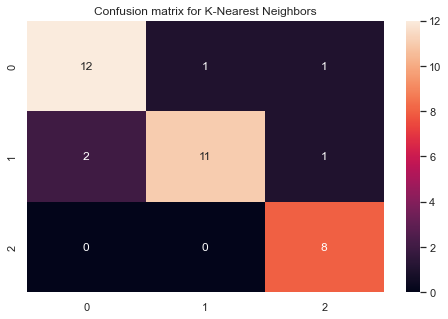

In [37]:
sns.heatmap(cf_matrix_kn, annot=True).set(title='Confusion matrix for K-Nearest Neighbors')

Aquí podem observar que el model prediu millor la classe 1 (12) on en falla 2, després la 2 (11) que en falla 3 i per últim la 3 (8) on ho encerta tot.Trobem 5 False Negative. La matriu de Logistic Regression mostra uns resultats millors.

In [38]:
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.79      0.85        14
           3       0.80      1.00      0.89         8

    accuracy                           0.86        36
   macro avg       0.86      0.88      0.86        36
weighted avg       0.87      0.86      0.86        36



Aquí observem que les mètriques donen valors per sota dels del model de Logistic Regression. En aquest cas el recall de la class 2 també és menor. 

### - Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.



- Millorem els paràmetres del model Logistic Regression

In [39]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid['penalty'] = ["l1", "l2", "elasticnet"]
search = GridSearchCV(lr, param_grid, scoring = 'f1_macro')
search.fit(X_train, y_train)
print(search.best_score_)
print(search.best_params_)

0.9575778229189187
{'penalty': 'l2', 'solver': 'newton-cg'}


In [41]:
from sklearn import metrics
bp_lr = LogisticRegression(penalty='l2', solver='newton-cg').fit(X_train,y_train)
y_predlr_bp = bp_lr.predict(X_test)
acc_bplr = metrics.accuracy_score(y_test, y_predlr_bp)
f1_bplr = f1_score(y_test, y_predlr_bp, average='macro')

- Millorem els parametres del model K-Nearest Neighbors

In [42]:
kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
kn = KNeighborsClassifier()

param = {'n_neighbors': [3,5,10],'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute') , 'weights': ('uniform', 'distance')},
rsearch = RandomizedSearchCV(estimator=kn,
                             param_distributions=param, cv=5,
                             n_iter=10, random_state=42, scoring='f1_macro')
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.9230527234722505
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}


In [44]:
from sklearn import metrics
bp_kn = KNeighborsClassifier(weights='distance', n_neighbors=3, algorithm='kd_tree').fit(X_train,y_train)
y_predkn_bp = bp_kn.predict(X_test)
acc_bpkn = metrics.accuracy_score(y_test, y_predkn_bp)
f1_bpkn = f1_score(y_test, y_predkn_bp, average='macro')

Comparem l'accuracy i l'f1 dels models originals amb els dels models tunejats:

In [45]:
metrics = pd.DataFrame( data = [['Logistic Regression', accur_lr, f1_lr, acc_bplr, f1_bplr ],
                                ['K-Nearest Neighbors', accur_kn, f1_kn, acc_bpkn, f1_bpkn ]],
                       columns = ['Model', 'Accuracy', 'F1', 'Tuned accuracy', 'Tuned f1'])
metrics.head()

,Model,Accuracy,F1,Tuned accuracy,Tuned f1
0,Logistic Regression,0.944444,0.943257,0.944444,0.943257
1,K-Nearest Neighbors,0.861111,0.864062,0.888889,0.884690


En aquest cas veiem que amb els paràmetres modificats ha millorat el model K-Nearest Neighbors, mentre que el model de Logistic Regression mostra les mateixes puntuacions.

### - Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [46]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
bp_lr = LogisticRegression(penalty='l2', solver='newton-cg')
bp_kn = KNeighborsClassifier(weights='distance', n_neighbors=3, algorithm='kd_tree')

lr_scores = cross_val_score(lr, X, y, cv=5)
kn_scores = cross_val_score(kn, X, y, cv=5)
bplr_scores = cross_val_score(bp_lr, X, y, cv=5)
bp_kn_scores = cross_val_score(bp_kn, X, y, cv=5)

lr_mean_score = round(np.mean(lr_scores), 2)
kn_mean_score = round(np.mean(kn_scores), 2)
lr_std_score = round(np.std(lr_scores), 2)
kn_std_score = round(np.std(kn_scores), 2)
bplr_mean_score = round(np.mean(bplr_scores), 2)
bpkn_mean_score =round(np.mean(bp_kn_scores), 2)
bplr_std_score = round(np.std(bplr_scores), 2)
bpkn_std_score = round(np.std(bp_kn_scores), 2)

print("Logistic Regression Mean Score: ", lr_mean_score)
print("Logistic Regression Standard Deviation Score: ", lr_std_score)
print("K Neighbors Classifier Mean Score: ", kn_mean_score)
print("K Neighbors Classifier Standard Deviation Score: ", kn_std_score)
print("Logistic Regression BP Mean Score: ", bplr_mean_score)
print("Logistic Regression BP Deviation Score: ", bplr_std_score)
print("K Neighbors Classifier BP Mean Score: ", bpkn_mean_score)
print("K Neighbors Classifier BP Deviation Score: ", bpkn_std_score)

Logistic Regression Mean Score:  0.94
Logistic Regression Standard Deviation Score:  0.03
K Neighbors Classifier Mean Score:  0.88
K Neighbors Classifier Standard Deviation Score:  0.01
Logistic Regression BP Mean Score:  0.94
Logistic Regression BP Deviation Score:  0.03
K Neighbors Classifier BP Mean Score:  0.92
K Neighbors Classifier BP Deviation Score:  0.03


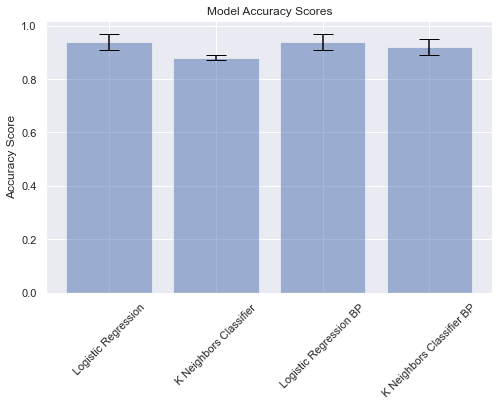

In [47]:
models = ['Logistic Regression', 'K Neighbors Classifier', 'Logistic Regression BP', 'K Neighbors Classifier BP']
mean_scores = [lr_mean_score, kn_mean_score, bplr_mean_score, bpkn_mean_score]
std_scores = [lr_std_score, kn_std_score, bplr_std_score, bpkn_std_score]

fig, ax = plt.subplots()
ax.bar(models, mean_scores, yerr=std_scores, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy Score')
ax.set_xticks(models)
ax.set_xticklabels(models, rotation=45)
ax.set_title('Model Accuracy Scores')

plt.show()

En general, quan el valor de la precisió mitjana és alt i la desviació estàndard és baixa, es considera que el model és fiable i està generalitzant bé. D'altra banda, quan la precisió mitjana és baixa i la desviació estàndard és alta, pot indicar que el model no funciona bé en la validació creuada i que probablement necessita ajustaments o millores. Tot i això, en general, és desitjable que el model tingui una precisió mitjana alta i una desviació estàndard baixa per poder confiar en la seva capacitat per generalitzar noves dades.
 
En conclussió, els resultats de la validació creuada són molt alts en els dos casos, en el cas de Logistic Regression i en el model de K Neighbors Classifier, sobretot en el cas del model amb els parametres millorats. Si hem de triar un dels dos, el model de Logistic Regression fa una millor performance en qualsevol cas. 


